In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import json
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error as mse
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter
from tensorflow.keras.models import load_model

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
data =  np.load('/content/gdrive/My Drive/Bird Species Classifier/Train2.npz')
data = data['arr_0']

In [4]:
labels =  np.load('/content/gdrive/My Drive/Bird Species Classifier/Train_label2.npz')
labels = labels['arr_0']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.2, random_state=0, stratify=labels)

In [6]:
X_train.shape

(3108, 13, 517, 1)

In [7]:
X_test.shape

(777, 13, 517, 1)

In [8]:
y_train.shape

(3108, 5)

In [9]:
y_test.shape

(777, 5)

In [10]:
def build_model1(input_shape):
  
  model = Sequential()

  model.add(Conv2D(32, kernel_size=5,input_shape=input_shape, activation = 'relu',padding="same"))
  model.add(Conv2D(32, kernel_size=5, activation = 'relu',padding="same"))
  
  model.add(MaxPool2D(2,2, padding="same"))
  model.add(BatchNormalization())

  model.add(Conv2D(64, kernel_size=3,activation = 'relu',padding="same"))
  model.add(Conv2D(64, kernel_size=3,activation = 'relu',padding="same"))
  model.add(MaxPool2D(2,2,padding="same"))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(64, activation = "relu"))
  model.add(Dense(5, activation = "softmax"))

  return model

In [11]:
input_shape = (13,517,1)

In [14]:
model = build_model1(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta = 0.1, verbose = 1)

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 13, 517, 32)       832       
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 517, 32)       25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 259, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 7, 259, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 259, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 259, 64)       

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=8)

Epoch 1/8
195/195 [==============================] - 5s 18ms/step - loss: 1.2262 - accuracy: 0.5238 - val_loss: 1.1179 - val_accuracy: 0.6152
Epoch 2/8
195/195 [==============================] - 3s 15ms/step - loss: 0.8316 - accuracy: 0.6821 - val_loss: 0.9037 - val_accuracy: 0.6744
Epoch 3/8
195/195 [==============================] - 3s 15ms/step - loss: 0.6214 - accuracy: 0.7735 - val_loss: 0.7398 - val_accuracy: 0.7297
Epoch 4/8
195/195 [==============================] - 3s 15ms/step - loss: 0.4630 - accuracy: 0.8414 - val_loss: 0.6940 - val_accuracy: 0.7439
Epoch 5/8
195/195 [==============================] - 3s 15ms/step - loss: 0.3291 - accuracy: 0.8893 - val_loss: 0.6400 - val_accuracy: 0.7658
Epoch 6/8
195/195 [==============================] - 3s 15ms/step - loss: 0.2159 - accuracy: 0.9373 - val_loss: 0.6311 - val_accuracy: 0.7812
Epoch 7/8
195/195 [==============================] - 3s 15ms/step - loss: 0.1224 - accuracy: 0.9717 - val_loss: 0.5947 - val_accuracy: 0.7748
Epoch 

In [ ]:
model.save('/content/gdrive/My Drive/Bird Species Classifier/BirdClassifier.h5')

In [ ]:
model = load_model('/content/gdrive/My Drive/Bird Species Classifier/BirdClassifier.h5')

In [ ]:
def plot_history(history):
    fig, axs = plt.subplots(2)
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

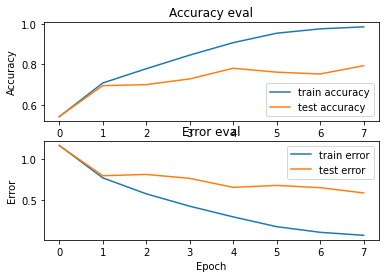

In [ ]:
plot_history(history)

In [ ]:
test_error,test_accuracy=model.evaluate(X_test,y_test,verbose=2)
print("Accuracy on original test set is:{}".format(test_accuracy))

pred = np.argmax(model.predict(X_test), axis=-1)

25/25 - 0s - loss: 0.5945 - accuracy: 0.7954 - 392ms/epoch - 16ms/step
Accuracy on original test set is:0.7953668236732483
25/25 [==============================] - 0s 7ms/step


In [ ]:
rounded_labels=np.argmax(y_test, axis=1)

In [ ]:
print(confusion_matrix(rounded_labels, pred))

[[ 87  10   3  16   9]
 [  5  87   8   9   6]
 [  6   1 185   8   4]
 [ 11  10  20  96  11]
 [  4   4   8   7 162]]


In [ ]:
model1={}
model1=classification_report(rounded_labels, pred,output_dict='true')
print(classification_report(rounded_labels, pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       125
           1       0.78      0.76      0.77       115
           2       0.83      0.91      0.86       204
           3       0.71      0.65      0.68       148
           4       0.84      0.88      0.86       185

    accuracy                           0.79       777
   macro avg       0.78      0.78      0.78       777
weighted avg       0.79      0.79      0.79       777

